In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=1)
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

/Users/costa/anaconda/envs/eden_env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/costa/anaconda/envs/eden_env/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
import os
import sys
root_dir = './'
src_dir = os.path.join(root_dir, 'code')
sys.path = [src_dir] + sys.path

In [20]:
from eden_rna.io.rfam import get_rfam_sequence
header, seq = get_rfam_sequence(rfam_id='RF00005', seq_id=6)
print header
print seq

AB031211.1/7799-7884
GCCGGGGUGGUGGAAUUGGCAGACACACAGGACUUAAAAUCCUGCGGUAGGUGACUACCGUGCCGGUUCAAGUCCGGCCCUCGGCA


In [37]:
from RaSE import StructuralStabilityEstimator
rase = StructuralStabilityEstimator(seq, k=6, avg_bp_prob_cutoff=0.1)

None


In [38]:
print rase.stability_score(0,'A')
print rase.stability_score(12,'U')

0.94686786466
0.522165109706


In [47]:
print rase.stability_score(0,'A', importance_semi_window=5)
print rase.stability_score(12,'U', importance_semi_window=5)

0.574633611575
0.234641032702


In [48]:
from RaSE import StructuralStabilityEstimator
rase = StructuralStabilityEstimator(seq, k=6, avg_bp_prob_cutoff=0.1, importance_window_begin=2, importance_window_end=12)

In [49]:
%%time
rase.compute_stability_scores()

CPU times: user 7.07 s, sys: 3.31 s, total: 10.4 s
Wall time: 54.9 s


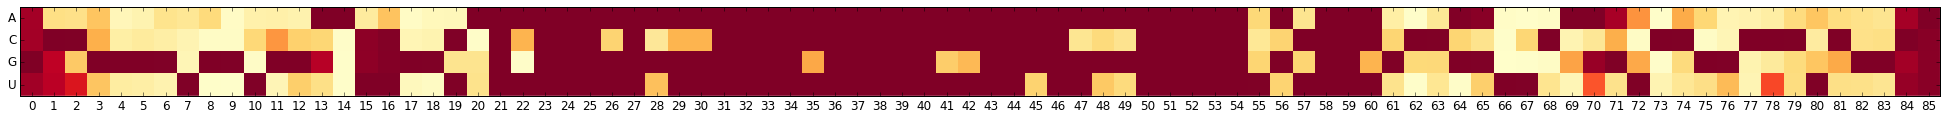

In [42]:
rase.plot_stability_matrix()

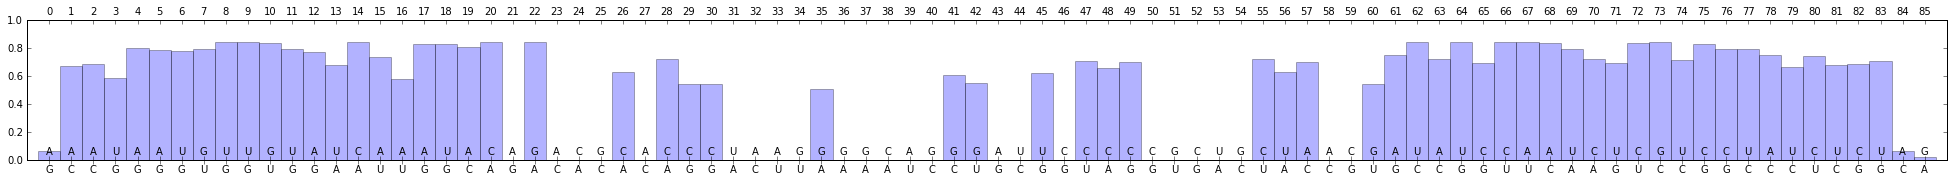

In [43]:
rase.plot_instability()

In [44]:
print rase.mutations

AAAUAAUGUUGUAUCAAAUACAGACGCACCCUAAGGGGCAGGGAUUCCCCCGCUGCUAACGAUAUCCAAUCUCGUCCUAUCUCUAG


In [45]:
for line in rase.output(): print line

            GCCGGGGUGGUGGAAUUGGCAGACACACAGGACUUAAAAUCCUGCGGUAGGUGACUACCGUGCCGGUUCAAGUCCGGCCCUCGGCA
            ((((((((((..(((((((((......(((((.......)))))((((((....)))))))))))))))....)).)))).)))).
G 00 A 0.94 .(((((((((..(((((((((......(((((.......)))))((((((....)))))))))))))))....)).)))).))).. 
C 01 A 0.33 ((.(((.(((..(((((((((......(((((.......)))))((((((....)))))))))))))))....))).))))).... 
C 02 A 0.31 ((((((.(((..(((((((((......(((((.......)))))((((((....)))))))))))))))....))).))))..)). 
G 03 U 0.41 (((.((((((..(((((((((......(((((.......)))))((((((....)))))))))))))))....)).))))..))). 
G 04 A 0.20 (((((((.(.(((((((((((......(((((.......)))))((((((....))))))))))))).....)))).)))))))). 
G 05 A 0.22 ((((((......(((((((((......(((((.......)))))((((((....)))))))))))))))...))))))........ 
G 06 U 0.22 ((((((((((..(((((((((......(((((.......)))))((((((....)))))))))))))))....)))))))..))). 
U 07 G 0.20 ((((((((((..(((((((((......(((((.......)))))((((((....)))))))))))))))....))..)))))))). 
G 

In [25]:
print rase.scores

[0.94612464115550365, 0.79143315665134562, 0.78857233600689591, 0.83733114176760282, 0.73504642661316799, 0.49194541290787414, 0.79938615471479324, 0.74705598841310372, 0.63091679563807213, 0.73903621694971122, 0.76527994740417482, 0.76293658648013973, 0.5221651097057326, 0.49526295148425209, 0.52760848094604507, 0.5990784372685537, 0.62683544428064497, 0.48363563648438701, 0.51817445221536773, 0.49239273633370617, 0.49217119558788675, 0.85856205777180139, 0.54589468744861103, 0.96362159499772815, 0.96213791318918207, 0.95399657638222579, 0.58828515020806438, 0.81152060211532695, 0.41713327089827595, 0.50394736026800524, 0.50933312518183915, 0.7393298294086047, 0.91890715050190985, 0.95819078725637774, 0.92708948323230667, 0.52276459505845674, 0.96564478460287084, 0.92922316360457602, 0.91894044922421458, 0.90540401287151973, 0.7720415834229345, 0.47365567118675939, 0.45963215091149223, 0.81235087028724662, 0.79298298404898904, 0.44489800943882685, 0.77723338634479799, 0.39553766233042

In [26]:
print rase.matrix

[[ 0.94686786  0.79143316  0.78857234  0.83864062  0.7417865   0.71010592
   0.8354212   0.74934553  0.6309168   0.77693682  0.79283857  0.79232955
   0.71462932  1.          1.          0.59907844  0.62683544  0.54681682
   0.51817445  0.50824078  1.          0.93924749  1.          0.96362159
   1.          0.95399658  1.          0.82812526  1.          0.77791955
   0.76654601  1.          0.94330618  0.96118137  0.96824537  1.          1.
   1.          1.          0.91609347  0.89995323  0.77717659  0.80201618
   0.81235087  0.85847728  0.85361391  0.80840053  0.90142447  1.
   0.92640628  0.9521747   0.96212083  0.96300818  1.          0.9265639
   0.41462747  1.          0.45726424  0.832578    0.85922944  0.87750796
   0.27094173  0.53743634  0.37131703  0.91792422  0.91347543  0.55500172
   0.74449304  0.73941628  1.          1.          0.95438556  0.87297208
   0.76831296  0.85456682  0.77638553  0.8033976   0.81411765  0.72449347
   0.82527923  0.84629612  0.8010794   0.79

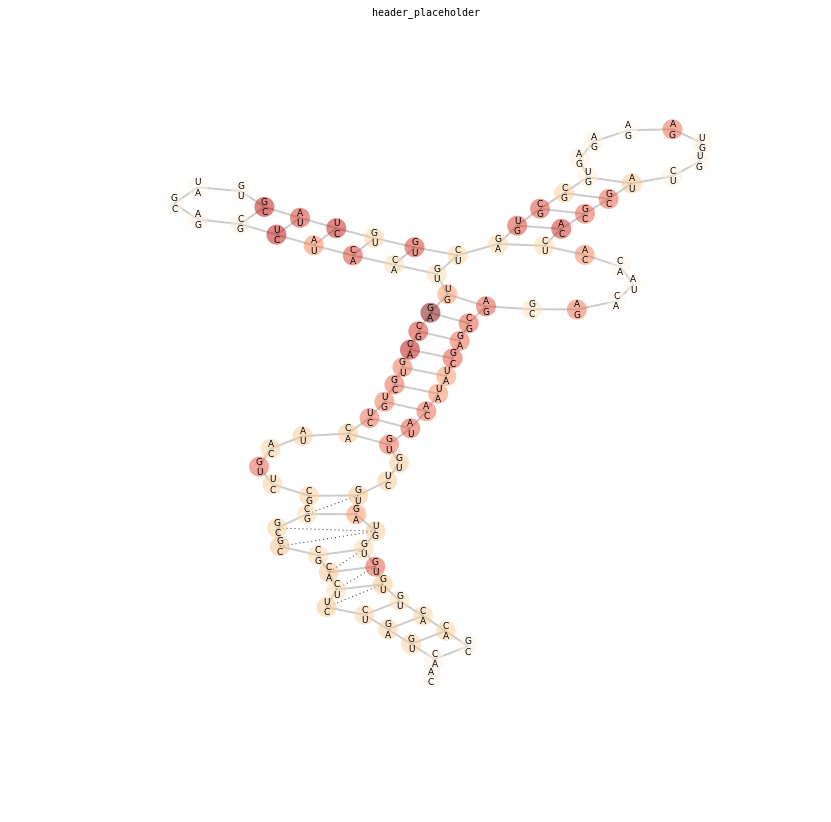

In [27]:
rase.draw()

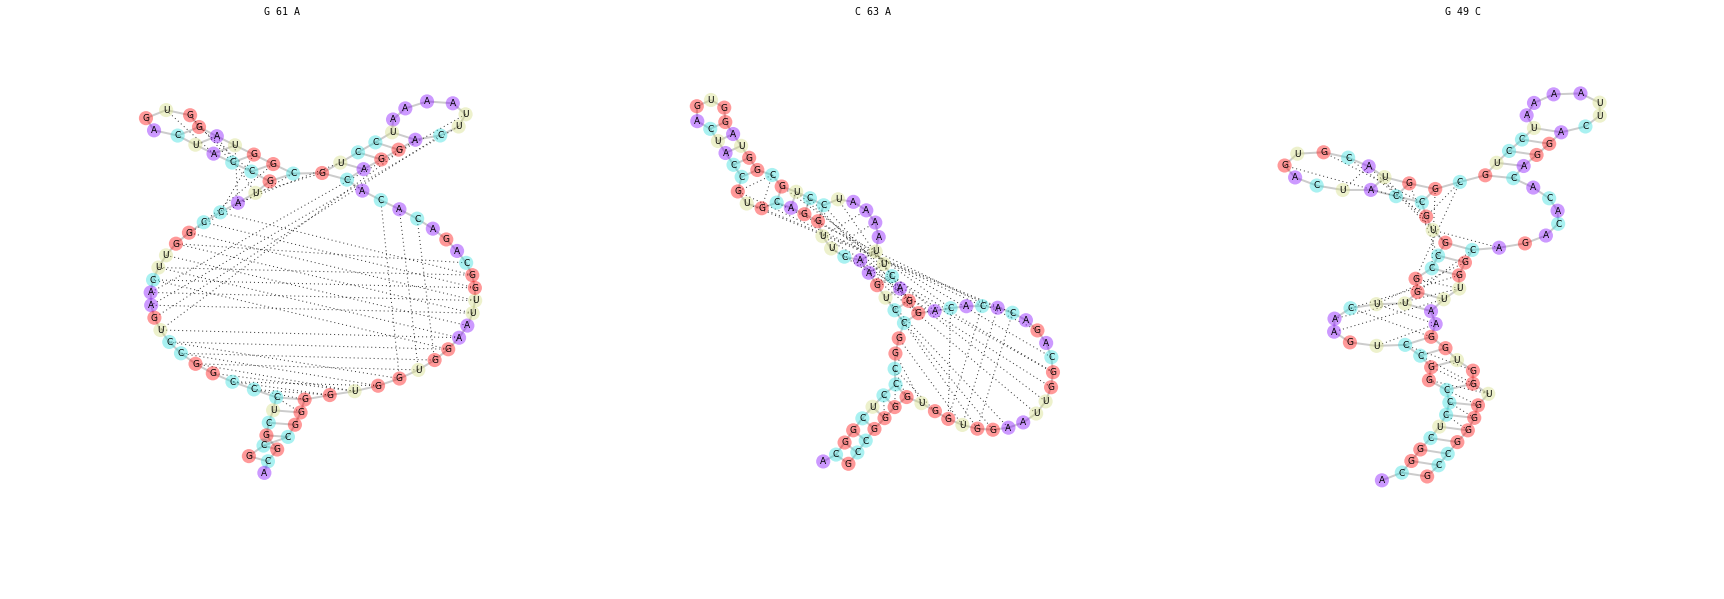

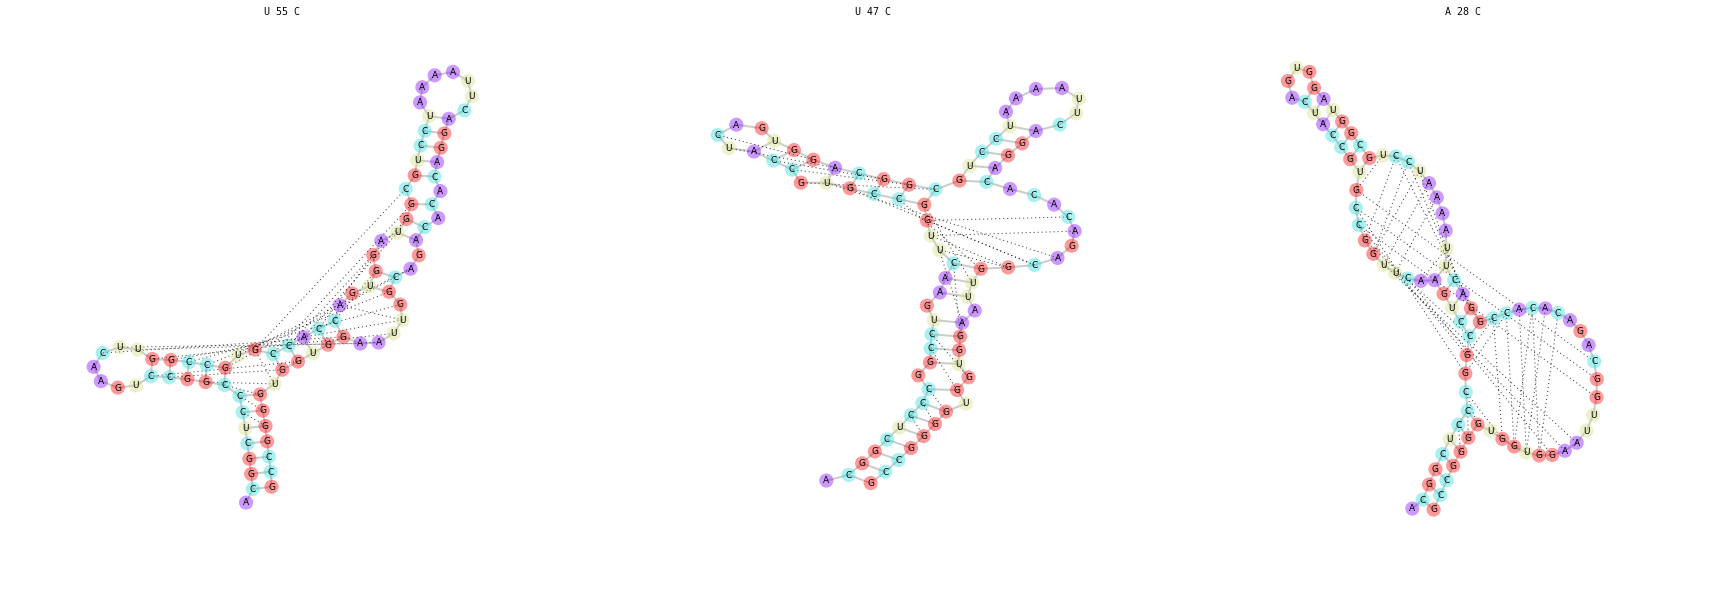

In [28]:
rase.draw_all()

---